# Тема “Обучение с учителем”

### Задание 1
> 1. Импортируйте библиотеки pandas и numpy.
> 2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
> 3. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
> 4. Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
> 5. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
> 6. Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


##### Импортируйте библиотеки pandas и numpy.

In [1]:
import numpy as np
import pandas as pd

##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

##### Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
# Загрузили датасет
ds = load_boston(); 

# Загрузили датасет data в массив data, т.к. полный датасет содержит 2 массива data и  target
#data = ds.data;
# Загрузили датасет target в массив target
#target = ds.target;
# Загрузили список фич
#feature_names = ds.feature_names;
# Посмотреть колонки датасета ds.keys()
# Посмотреть размерность датасета ds_data.shape
# Список фич (признаков) ds.feature_names
# Посмотреть массив ds_data

> Разобъем данные на датафреймы (тестовый и тренировочный).

In [4]:
x = pd.DataFrame(ds.data, columns = ds.feature_names);
y = pd.DataFrame(ds.target, columns = ['target_price']);

> Загрузим класс для разбиения выборок.

In [5]:
from sklearn.model_selection import train_test_split

> Разобьем датасеты на 2 выборки.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

##### Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

> Загрузим класс для линейной регрессии.

In [7]:
from sklearn.linear_model import LinearRegression

> Создадим модель линейной регрессии

In [8]:
lr = LinearRegression()

##### Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

> Посмотрим все признаки 

In [9]:
np.ndarray.tolist(ds.feature_names)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

> Обучение и тренировка модели

In [10]:
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

> Посмотрим график и сравним точность для наших предсказаний.     
Конвертируем некоторые отрицательные числа в положительные, т.к. это скорее всего ошибка. Используем функцию abs.

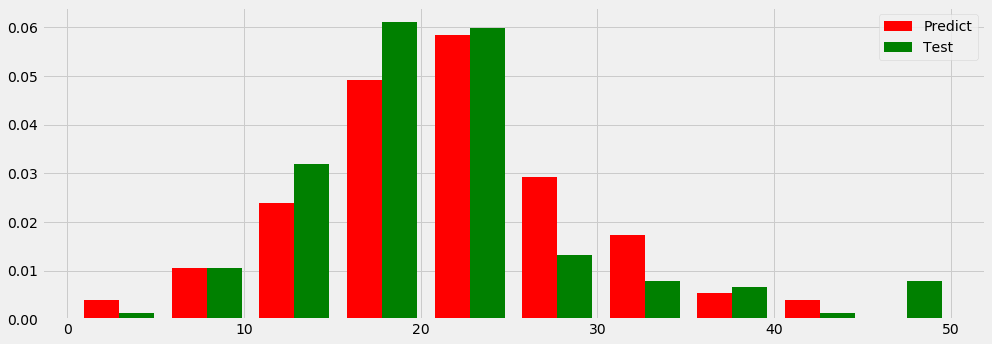

In [76]:
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize = (14,5))

pr = abs(pd.Series(predictions.flatten()).reset_index(drop = True))
pr_min = pd.Series.min(pr)
pr_max = pd.Series.max(pr)

yt = abs(y_test['target_price'].reset_index(drop = True))
yt_min = pd.Series.min(y_test['target_price'])
yt_max = pd.Series.max(y_test['target_price'])


plt.hist(
    [np.clip(pr, pr_min, pr_max),
     np.clip(yt, yt_min, yt_max),
     ],
    color = ['red', 'green'],
    label = ['Predict', 'Test'],
    density = True
);
plt.legend(loc = 'best');
plt.xlabel('')
fig.tight_layout();


In [80]:
check_pred = pd.DataFrame({'test':yt.reset_index(drop = True),'predict':pr})
check_pred['error'] = yt - pr
check_pred.head()


,test,predict,error
0,23.6,28.648960,-5.048960
1,32.4,36.495014,-4.095014
2,13.6,15.411193,-1.811193
3,22.8,25.403213,-2.603213
4,16.1,18.855280,-2.755280


##### Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

> Вычислим среднеквадратичное отклонение руками

In [79]:
mse_manual = (check_pred['error']**2).mean()
mse


20.028009782816454

> Импортируем mean_squared_error из модуля sklearn.metrics

In [82]:
from sklearn.metrics import mean_squared_error

In [84]:
mse_library = mean_squared_error(yt,pr)
mse_library

20.028009782816447

##### Вычислим  R2

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(yt,pr)

0.731214900814652

### Задание 2
> 1. Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
> 2. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
> 3. Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
> 4. Сделайте предсказание на тестовых данных и посчитайте R2. 
> 5. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


##### Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
##### Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [131]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=100)

X_train
y_train
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)